In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import librosa
import librosa.display
import IPython.display as pld
import warnings
warnings.filterwarnings('ignore')
import csv
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import tensorflow as tf

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df1=pd.read_csv('/content/drive/MyDrive/DATASETS/EmoDB Dataset/train_fold2.csv')
df1

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,250,251,252,253,254,255,256,257,258,0.1
0,0,-482.45233,62.835957,-0.348998,26.264595,2.978607,6.900927,-13.006243,0.273391,-9.196591,...,0.675823,0.684034,0.627376,-0.001574,0.012645,-0.027069,0.019313,-0.002252,-0.006220,0
1,1,-469.48477,88.400730,-7.127512,29.156132,5.335554,7.147227,-6.727572,-8.307674,-3.364513,...,0.635522,0.544438,0.532856,-0.018488,0.011973,-0.011038,0.079758,-0.021044,-0.019445,1
2,2,-434.88647,41.972150,-29.416862,18.537344,-4.156565,5.257353,-11.410935,-8.983023,-11.285996,...,0.648380,0.675295,0.560000,-0.010576,-0.000228,0.011102,-0.074188,0.012116,-0.000779,2
3,3,-447.12630,86.114920,4.772520,38.097256,8.324276,8.538317,-4.507682,-7.680664,-7.317249,...,0.615263,0.566964,0.605103,-0.008389,-0.051995,-0.056544,-0.020014,0.013964,0.008349,1
4,4,-451.45264,71.335200,12.223010,32.649555,3.997801,15.200773,-2.812883,-1.384373,-6.467040,...,0.719856,0.667424,0.570905,0.003044,-0.006101,-0.009038,-0.049699,0.027615,0.021319,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,423,-429.41583,51.232320,-4.127894,38.715740,2.253632,-2.197497,-15.981533,-14.225066,-17.897070,...,0.589742,0.609879,0.515997,-0.019026,0.000340,-0.022717,-0.020690,-0.002970,-0.001101,6
424,424,-478.05527,5.705422,-24.631056,27.622614,-19.235449,-7.040019,-13.293165,-9.629133,-14.067036,...,0.590422,0.481957,0.481437,-0.011216,-0.031485,-0.029936,0.042160,-0.013815,0.009839,0
425,425,-418.62490,57.015880,6.383415,47.618423,-8.051490,4.213936,-15.029120,-2.448467,-10.805821,...,0.569263,0.551809,0.576764,0.016046,-0.025610,0.025426,-0.094371,0.008999,-0.004985,5
426,426,-467.15588,52.217026,10.470471,47.414780,8.690019,15.601270,-2.032935,4.985774,-7.432734,...,0.523647,0.509723,0.498566,0.051532,0.015525,-0.006052,0.018201,0.004361,-0.021649,3


In [57]:
df2=pd.read_csv('/content/drive/MyDrive/DATASETS/EmoDB Dataset/test_fold2.csv')
df2

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,250,251,252,253,254,255,256,257,258,0.1
0,0,-454.89886,45.067265,-0.193278,15.111545,3.080835,4.204241,-10.440731,-6.615343,-16.249382,...,0.575784,0.523305,0.423375,0.009395,-0.025547,-0.035554,-0.025885,0.011198,-0.000163,0
1,1,-445.90384,103.783450,1.365116,27.908356,-4.542189,10.230102,-10.717600,-8.279192,-2.135225,...,0.659291,0.604083,0.500168,0.006800,-0.019560,-0.049193,-0.089028,0.020237,0.023672,5
2,2,-432.85320,94.606660,-5.319786,25.696900,0.194088,7.087550,-1.224768,-5.595039,-10.824135,...,0.605255,0.605432,0.592474,-0.008104,-0.009647,-0.046115,-0.007378,0.006855,-0.004688,1
3,3,-414.28708,45.442410,5.925002,21.436172,0.354569,7.393221,-7.657958,-4.724375,-18.931787,...,0.618056,0.525700,0.500340,-0.018470,-0.007622,-0.006954,0.023004,0.002193,-0.005318,0
4,4,-434.16900,78.900970,4.866675,45.928330,4.804515,2.177262,-13.456310,-5.863212,-3.584935,...,0.660314,0.630964,0.564337,-0.004686,0.006942,0.026904,0.006124,0.004141,0.017759,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,102,-392.46520,73.364350,-3.410112,28.893300,-9.239878,17.295076,-14.857638,-8.589843,-15.333829,...,0.555782,0.517858,0.473756,0.000104,-0.007319,-0.020273,0.040238,0.012407,-0.014820,1
103,103,-431.76166,50.142090,3.661988,45.098984,-13.927658,-0.977742,-16.576310,0.029880,-0.389472,...,0.607035,0.589502,0.506217,0.006985,0.040552,0.005959,-0.065906,-0.023141,-0.005444,5
104,104,-403.50656,30.989262,-12.756512,27.214573,-10.573180,-0.137991,-15.470394,-8.865036,-16.384440,...,0.531090,0.567376,0.470224,-0.005500,0.013583,0.040782,0.003971,0.017743,0.026657,4
105,105,-427.36716,51.473750,4.835125,40.900140,6.937289,13.700687,-8.331753,-0.583414,-6.279562,...,0.638155,0.574542,0.503516,0.019632,0.046315,0.074801,0.018078,0.022948,-0.016365,3


In [58]:
df1['0'].unique()

array([-482.45233, -469.48477, -434.88647, -447.1263 , -451.45264,
       -433.33972, -465.2206 , -407.61963, -478.92007, -438.46402,
       -451.66434, -415.74384, -444.03302, -449.64343, -448.45706,
       -447.862  , -447.8849 , -405.8289 , -414.1051 , -415.96158,
       -425.45212, -403.34033, -452.2124 , -491.33237, -433.93875,
       -456.17935, -381.5805 , -454.38022, -437.03818, -508.38065,
       -440.73105, -525.19977, -451.39062, -447.41296, -474.65   ,
       -456.05096, -474.31326, -390.37305, -446.3631 , -436.3282 ,
       -433.23328, -439.48215, -466.99695, -466.81842, -494.3395 ,
       -426.0529 , -430.6762 , -482.82642, -448.18274, -410.33658,
       -446.7974 , -453.8969 , -453.46445, -376.84555, -436.69876,
       -493.1862 , -442.59415, -454.48465, -468.04486, -456.72043,
       -416.0819 , -418.3227 , -423.0657 , -478.63577, -483.07538,
       -434.9256 , -435.4896 , -399.51852, -402.0103 , -464.13718,
       -461.44766, -474.8092 , -503.61353, -453.04343, -482.67

In [59]:
df2['0'].unique()

array([-454.89886, -445.90384, -432.8532 , -414.28708, -434.169  ,
       -440.71924, -448.62344, -423.79208, -457.93448, -521.504  ,
       -446.97107, -446.98584, -461.82983, -425.79813, -464.07745,
       -432.09225, -500.27402, -465.1539 , -424.5544 , -469.68045,
       -444.93484, -456.18542, -437.33456, -514.9054 , -449.0555 ,
       -403.73657, -405.75662, -377.2399 , -433.1373 , -434.17294,
       -448.68094, -423.73795, -447.18866, -446.1366 , -514.8218 ,
       -364.07712, -373.46188, -427.5882 , -437.44412, -440.67435,
       -416.39185, -454.6912 , -443.02942, -470.54938, -407.5873 ,
       -409.21838, -469.223  , -443.0332 , -513.6494 , -434.86633,
       -435.5582 , -501.81232, -444.86087, -443.18646, -441.78366,
       -402.7788 , -467.03882, -428.71326, -438.01385, -423.7153 ,
       -459.8976 , -407.01892, -428.13434, -365.09543, -416.07724,
       -438.8606 , -447.04645, -387.3086 , -420.1675 , -409.21655,
       -414.18164, -468.193  , -444.60718, -418.8131 , -439.90

In [60]:
x_train=df1.iloc[:,0:(df1.shape[1]-1)]
y_train=df1.iloc[:,-1]

In [61]:
x_train

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,249,250,251,252,253,254,255,256,257,258
0,0,-482.45233,62.835957,-0.348998,26.264595,2.978607,6.900927,-13.006243,0.273391,-9.196591,...,0.635609,0.675823,0.684034,0.627376,-0.001574,0.012645,-0.027069,0.019313,-0.002252,-0.006220
1,1,-469.48477,88.400730,-7.127512,29.156132,5.335554,7.147227,-6.727572,-8.307674,-3.364513,...,0.646426,0.635522,0.544438,0.532856,-0.018488,0.011973,-0.011038,0.079758,-0.021044,-0.019445
2,2,-434.88647,41.972150,-29.416862,18.537344,-4.156565,5.257353,-11.410935,-8.983023,-11.285996,...,0.600825,0.648380,0.675295,0.560000,-0.010576,-0.000228,0.011102,-0.074188,0.012116,-0.000779
3,3,-447.12630,86.114920,4.772520,38.097256,8.324276,8.538317,-4.507682,-7.680664,-7.317249,...,0.698287,0.615263,0.566964,0.605103,-0.008389,-0.051995,-0.056544,-0.020014,0.013964,0.008349
4,4,-451.45264,71.335200,12.223010,32.649555,3.997801,15.200773,-2.812883,-1.384373,-6.467040,...,0.696758,0.719856,0.667424,0.570905,0.003044,-0.006101,-0.009038,-0.049699,0.027615,0.021319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,423,-429.41583,51.232320,-4.127894,38.715740,2.253632,-2.197497,-15.981533,-14.225066,-17.897070,...,0.556236,0.589742,0.609879,0.515997,-0.019026,0.000340,-0.022717,-0.020690,-0.002970,-0.001101
424,424,-478.05527,5.705422,-24.631056,27.622614,-19.235449,-7.040019,-13.293165,-9.629133,-14.067036,...,0.597085,0.590422,0.481957,0.481437,-0.011216,-0.031485,-0.029936,0.042160,-0.013815,0.009839
425,425,-418.62490,57.015880,6.383415,47.618423,-8.051490,4.213936,-15.029120,-2.448467,-10.805821,...,0.566316,0.569263,0.551809,0.576764,0.016046,-0.025610,0.025426,-0.094371,0.008999,-0.004985
426,426,-467.15588,52.217026,10.470471,47.414780,8.690019,15.601270,-2.032935,4.985774,-7.432734,...,0.531997,0.523647,0.509723,0.498566,0.051532,0.015525,-0.006052,0.018201,0.004361,-0.021649


In [62]:
y_train

0      0
1      1
2      2
3      1
4      3
      ..
423    6
424    0
425    5
426    3
427    2
Name: 0.1, Length: 428, dtype: int64

In [63]:
x_test=df2.iloc[:,0:(df2.shape[1]-1)]
y_test=df2.iloc[:,-1]

In [64]:
x_test

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,249,250,251,252,253,254,255,256,257,258
0,0,-454.89886,45.067265,-0.193278,15.111545,3.080835,4.204241,-10.440731,-6.615343,-16.249382,...,0.506934,0.575784,0.523305,0.423375,0.009395,-0.025547,-0.035554,-0.025885,0.011198,-0.000163
1,1,-445.90384,103.783450,1.365116,27.908356,-4.542189,10.230102,-10.717600,-8.279192,-2.135225,...,0.590438,0.659291,0.604083,0.500168,0.006800,-0.019560,-0.049193,-0.089028,0.020237,0.023672
2,2,-432.85320,94.606660,-5.319786,25.696900,0.194088,7.087550,-1.224768,-5.595039,-10.824135,...,0.622093,0.605255,0.605432,0.592474,-0.008104,-0.009647,-0.046115,-0.007378,0.006855,-0.004688
3,3,-414.28708,45.442410,5.925002,21.436172,0.354569,7.393221,-7.657958,-4.724375,-18.931787,...,0.648508,0.618056,0.525700,0.500340,-0.018470,-0.007622,-0.006954,0.023004,0.002193,-0.005318
4,4,-434.16900,78.900970,4.866675,45.928330,4.804515,2.177262,-13.456310,-5.863212,-3.584935,...,0.658636,0.660314,0.630964,0.564337,-0.004686,0.006942,0.026904,0.006124,0.004141,0.017759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,102,-392.46520,73.364350,-3.410112,28.893300,-9.239878,17.295076,-14.857638,-8.589843,-15.333829,...,0.571422,0.555782,0.517858,0.473756,0.000104,-0.007319,-0.020273,0.040238,0.012407,-0.014820
103,103,-431.76166,50.142090,3.661988,45.098984,-13.927658,-0.977742,-16.576310,0.029880,-0.389472,...,0.583082,0.607035,0.589502,0.506217,0.006985,0.040552,0.005959,-0.065906,-0.023141,-0.005444
104,104,-403.50656,30.989262,-12.756512,27.214573,-10.573180,-0.137991,-15.470394,-8.865036,-16.384440,...,0.457819,0.531090,0.567376,0.470224,-0.005500,0.013583,0.040782,0.003971,0.017743,0.026657
105,105,-427.36716,51.473750,4.835125,40.900140,6.937289,13.700687,-8.331753,-0.583414,-6.279562,...,0.671834,0.638155,0.574542,0.503516,0.019632,0.046315,0.074801,0.018078,0.022948,-0.016365


In [65]:
y_test

0      0
1      5
2      1
3      0
4      5
      ..
102    1
103    5
104    4
105    3
106    2
Name: 0.1, Length: 107, dtype: int64

<Axes: ylabel='count'>

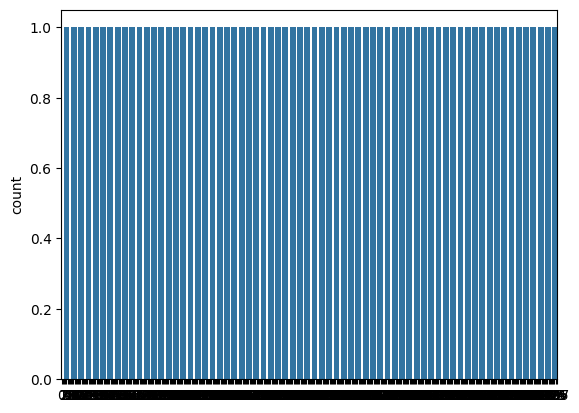

In [66]:
sns.countplot(df1['0'])

<Axes: ylabel='count'>

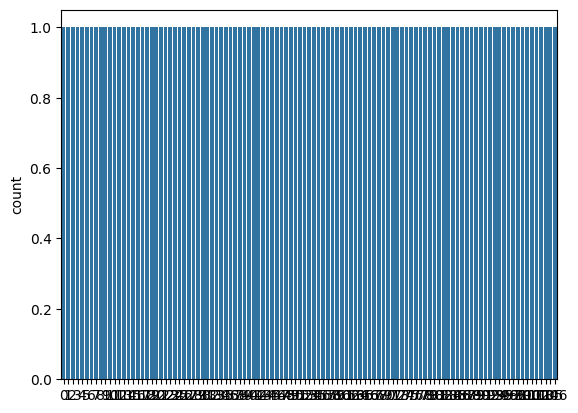

In [67]:
sns.countplot(df2['0'])

In [68]:
# from sklearn.model_selection import train_test_split

In [69]:
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [70]:
# x_train

In [71]:
# y_train

In [72]:
# x_test

In [73]:
# y_test

In [74]:
#Check unique values for y_test
y_test.unique()

array([0, 5, 1, 2, 3, 4, 6])

In [75]:
#Check unique values for y_train
y_train.unique()

array([0, 1, 2, 3, 4, 5, 6])

In [76]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 1.0726817042606516,
 1: 0.9705215419501134,
 2: 0.6053748231966054,
 3: 1.2228571428571429,
 4: 1.1116883116883116,
 5: 0.9406593406593406,
 6: 1.6525096525096525}

In [77]:
from sklearn.preprocessing import StandardScaler
#Normalize the data
scaler = StandardScaler()
scaler.fit(x_train)
X_train_scalled = scaler.transform(x_train)
X_test_scalled = scaler.transform(x_test)

In [78]:
#Import packages for CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv1D
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, BatchNormalization, Flatten, MaxPooling1D
from keras.layers import LeakyReLU
from keras.regularizers import l2


In [79]:
import random
res = []
for j in range(4):
    res.append(random.randint(300, 1000))
# res.sort(reverse=True)
print(res)

[553, 706, 332, 846]


In [80]:
ANN_model = Sequential()

ANN_model.add(Dense(999,input_shape=(X_train_scalled.shape[1],),activation='elu')),
ANN_model.add(BatchNormalization()),
ANN_model.add(Dropout(0.1)),
#LAYER1
ANN_model.add(Dense(785,activation='elu')),
#kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01),
#kernel_regularizer=l2(0.001)
ANN_model.add(BatchNormalization()),
ANN_model.add(Dropout(0.2)),

#LAYER2
ANN_model.add(Dense(865,activation='elu')),
#kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01),
ANN_model.add(BatchNormalization()),
ANN_model.add(Dropout(0.2)),

#LAYER3
ANN_model.add(Dense(672,activation='elu')),
#kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01),
ANN_model.add(BatchNormalization()),
ANN_model.add(Dropout(0.3)),
ANN_model.add(Dense(7,activation='softmax')),
ANN_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 999)               260739    
                                                                 
 batch_normalization_4 (Bat  (None, 999)               3996      
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 999)               0         
                                                                 
 dense_6 (Dense)             (None, 785)               785000    
                                                                 
 batch_normalization_5 (Bat  (None, 785)               3140      
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 785)              

In [81]:
import os
import tempfile
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
ANN_model.save_weights(initial_weights)

In [82]:
ANN_model.load_weights(initial_weights)

In [83]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
ANN_model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',                             #CategoricalCrossentropy
              metrics=['SparseCategoricalAccuracy'])
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 999)               260739    
                                                                 
 batch_normalization_4 (Bat  (None, 999)               3996      
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 999)               0         
                                                                 
 dense_6 (Dense)             (None, 785)               785000    
                                                                 
 batch_normalization_5 (Bat  (None, 785)               3140      
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 785)              

In [84]:
checkpoint_path='Ann_EMODB_mfcc-spectro-melspectrogram_5fold1_elu11.ckpt'
checkpoint_dir=os.path.dirname(checkpoint_path)
callback1=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor='val_sparse_categorical_accuracy', verbose=1,
   save_best_only=True,save_weights_only=True,)
callback2=tf.keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy',min_delta=0, patience=400, verbose=0, mode='auto',baseline=None,restore_best_weights=True)
cp_callback=[callback1,callback2]

In [85]:
history = ANN_model.fit(X_train_scalled, y_train, validation_data=(X_test_scalled, y_test), batch_size=64, epochs=1200, verbose=1,class_weight=class_weights,callbacks=cp_callback)

Epoch 1/1200
1/7 [===>..........................] - ETA: 17s - loss: 3.1148 - sparse_categorical_accuracy: 0.2031
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.50467, saving model to Ann_EMODB_mfcc-spectro-melspectrogram_5fold1_elu11.ckpt
7/7 [==============================] - 3s 81ms/step - loss: 2.0339 - sparse_categorical_accuracy: 0.3598 - val_loss: 1.2846 - val_sparse_categorical_accuracy: 0.5047
Epoch 2/1200
1/7 [===>..........................] - ETA: 0s - loss: 1.2187 - sparse_categorical_accuracy: 0.5781
Epoch 2: val_sparse_categorical_accuracy improved from 0.50467 to 0.58879, saving model to Ann_EMODB_mfcc-spectro-melspectrogram_5fold1_elu11.ckpt
7/7 [==============================] - 0s 34ms/step - loss: 1.2285 - sparse_categorical_accuracy: 0.5678 - val_loss: 1.0629 - val_sparse_categorical_accuracy: 0.5888
Epoch 3/1200
1/7 [===>..........................] - ETA: 0s - loss: 1.1032 - sparse_categorical_accuracy: 0.6406
Epoch 3: val_sparse_categorical_accur

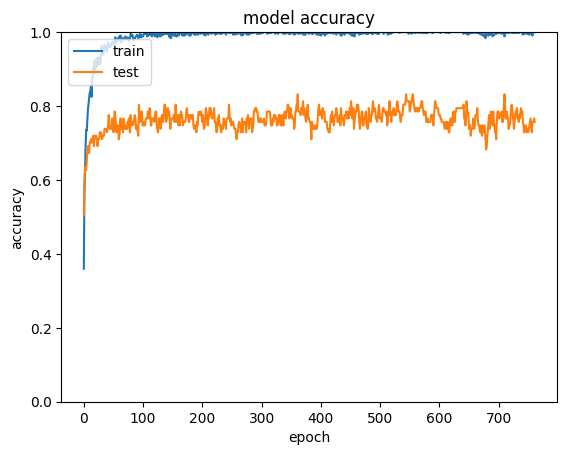

In [86]:
#Plot model accuracy over ephocs
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [87]:
ANN_model.load_weights(checkpoint_path) #to load model with highest accuracy

In [88]:
# Calculate pre-training accuracy
score = ANN_model.evaluate(X_test_scalled, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 1.1821 - sparse_categorical_accuracy: 0.8318
Pre-training accuracy: 83.1776%


In [89]:
# Evaluating the model on the training and testing set
score = ANN_model.evaluate(X_train_scalled, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = ANN_model.evaluate(X_test_scalled, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  1.0
Testing Accuracy:  0.8317757248878479


In [90]:
#Get predictions from model
y_test_predictions = ANN_model.predict(X_test_scalled) # it will give the prediction data of the model

4/4 [==============================] - 0s 5ms/step


In [91]:
y_test_predictions.shape

(107, 7)

In [92]:
y_test_predictions

array([[9.05186404e-03, 1.52911923e-06, 8.96720663e-02, 7.73748354e-08,
        9.01244879e-01, 3.83854282e-09, 2.95701720e-05],
       [8.69442772e-07, 9.98863459e-01, 1.33731266e-08, 2.75533021e-05,
        2.24517349e-10, 1.10804813e-03, 4.17587707e-08],
       [1.03229081e-06, 9.99976516e-01, 4.58138084e-06, 8.39364134e-09,
        6.34570014e-08, 1.34479733e-05, 4.29390411e-06],
       [1.34088987e-04, 1.10978413e-04, 8.69698761e-06, 1.24842428e-10,
        9.99746025e-01, 7.94683999e-08, 8.11146350e-08],
       [1.43258251e-06, 1.08887174e-03, 1.16982953e-12, 8.08902939e-07,
        1.07638794e-10, 9.98901963e-01, 6.90131537e-06],
       [1.67900879e-07, 9.76684049e-08, 9.99999642e-01, 3.47880405e-11,
        1.04707986e-07, 7.32927330e-11, 2.06330841e-09],
       [3.36819213e-08, 1.00000000e+00, 3.30141720e-10, 4.42858684e-12,
        1.10641383e-11, 2.05874495e-09, 4.56870819e-10],
       [6.42609805e-08, 9.99974251e-01, 3.28931760e-12, 1.09737540e-11,
        6.43631326e-09, 2

In [93]:
y_test_predictions=np.argmax(y_test_predictions,axis=1)

In [94]:
y_test_predictions

array([4, 1, 1, 4, 5, 2, 1, 1, 2, 2, 0, 0, 3, 0, 1, 1, 3, 0, 5, 2, 4, 1,
       5, 2, 6, 1, 1, 4, 2, 1, 3, 2, 0, 1, 2, 4, 5, 3, 2, 5, 5, 2, 4, 2,
       6, 4, 2, 1, 3, 4, 1, 3, 2, 0, 3, 4, 2, 2, 2, 2, 2, 6, 5, 4, 2, 5,
       2, 6, 0, 1, 2, 1, 2, 4, 2, 1, 2, 4, 3, 2, 4, 2, 4, 3, 0, 5, 1, 6,
       4, 5, 2, 2, 2, 3, 6, 3, 3, 3, 2, 6, 0, 0, 1, 5, 4, 3, 2])

In [95]:
# df.replace({ 'happyness': 0, 'neutral': 1,'anger': 2,'sadness': 3, 'fear':4,'boredom':5,'disgust':6}, inplace=True)

In [96]:
emotions={
 0: 'happyness',
 1: 'neutral',
 2: 'anger',
 3: 'sadness',
 4: 'fear',
 5: 'boredom',
 6: 'disgust',
}

In [97]:
label=[]
for i in y_test_predictions:
    label1=emotions[i]
    label.append(label1)
label
y_pred_acc=np.array(label)

In [98]:
y_pred_acc

array(['fear', 'neutral', 'neutral', 'fear', 'boredom', 'anger',
       'neutral', 'neutral', 'anger', 'anger', 'happyness', 'happyness',
       'sadness', 'happyness', 'neutral', 'neutral', 'sadness',
       'happyness', 'boredom', 'anger', 'fear', 'neutral', 'boredom',
       'anger', 'disgust', 'neutral', 'neutral', 'fear', 'anger',
       'neutral', 'sadness', 'anger', 'happyness', 'neutral', 'anger',
       'fear', 'boredom', 'sadness', 'anger', 'boredom', 'boredom',
       'anger', 'fear', 'anger', 'disgust', 'fear', 'anger', 'neutral',
       'sadness', 'fear', 'neutral', 'sadness', 'anger', 'happyness',
       'sadness', 'fear', 'anger', 'anger', 'anger', 'anger', 'anger',
       'disgust', 'boredom', 'fear', 'anger', 'boredom', 'anger',
       'disgust', 'happyness', 'neutral', 'anger', 'neutral', 'anger',
       'fear', 'anger', 'neutral', 'anger', 'fear', 'sadness', 'anger',
       'fear', 'anger', 'fear', 'sadness', 'happyness', 'boredom',
       'neutral', 'disgust', 'fear

In [99]:
y_test

0      0
1      5
2      1
3      0
4      5
      ..
102    1
103    5
104    4
105    3
106    2
Name: 0.1, Length: 107, dtype: int64

In [100]:
emotion={
 0: 'happyness',
 1: 'neutral',
 2: 'anger',
 3: 'sadness',
 4: 'fear',
 5: 'boredom',
 6: 'disgust',
}

In [101]:
label_test=[]
for i in y_test:
    label_test.append(emotion[i])
label_test
y_true_accu=np.array(label_test)


In [102]:
y_true_accu

array(['happyness', 'boredom', 'neutral', 'happyness', 'boredom', 'anger',
       'neutral', 'neutral', 'anger', 'anger', 'happyness', 'happyness',
       'sadness', 'happyness', 'neutral', 'neutral', 'sadness',
       'happyness', 'boredom', 'anger', 'fear', 'neutral', 'boredom',
       'happyness', 'disgust', 'boredom', 'neutral', 'sadness', 'anger',
       'neutral', 'fear', 'anger', 'happyness', 'neutral', 'anger',
       'fear', 'boredom', 'sadness', 'anger', 'boredom', 'boredom',
       'fear', 'fear', 'anger', 'boredom', 'fear', 'anger', 'boredom',
       'sadness', 'fear', 'neutral', 'disgust', 'anger', 'neutral',
       'sadness', 'fear', 'disgust', 'anger', 'anger', 'anger', 'anger',
       'disgust', 'boredom', 'disgust', 'anger', 'boredom', 'anger',
       'disgust', 'happyness', 'boredom', 'anger', 'neutral', 'anger',
       'fear', 'happyness', 'neutral', 'anger', 'fear', 'sadness',
       'anger', 'fear', 'happyness', 'fear', 'neutral', 'happyness',
       'boredom', 'ne

In [103]:
#DataFlair - Calculate the accuracy of our model
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_true=y_true_accu, y_pred=y_pred_acc)

#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 83.18%


In [104]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true=y_true_accu, y_pred=y_pred_acc)

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_true_accu,y_pred_acc))

              precision    recall  f1-score   support

       anger       0.84      1.00      0.91        26
     boredom       1.00      0.69      0.81        16
     disgust       0.86      0.67      0.75         9
        fear       0.75      0.86      0.80        14
   happyness       0.90      0.64      0.75        14
     neutral       0.78      0.88      0.82        16
     sadness       0.79      0.92      0.85        12

    accuracy                           0.83       107
   macro avg       0.84      0.81      0.81       107
weighted avg       0.85      0.83      0.83       107

